/home/mltest/my_project/my_project_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Printing XGBoost result:
                 precision    recall  f1-score   support

   anomaly-spam       1.00      0.96      0.98       134
anomaly-sshscan       1.00      0.97      0.99        34
     background       0.97      1.00      0.99      5971
      blacklist       1.00      0.97      0.99      5987
            dos       1.00      1.00      1.00      1335
    nerisbotnet       1.00      0.98      0.99       570
         scan11       1.00      1.00      1.00      5984
         scan44       1.00      1.00      1.00      5907

       accuracy                           0.99     25922
      macro avg       1.00      0.99      0.99     25922
   weighted avg       0.99      0.99      0.99     25922

-----------------------------------------------------------------------
Accuracy: 99.29%; precision: 99.31%; Recall: 99.29%; F1: 99.29%


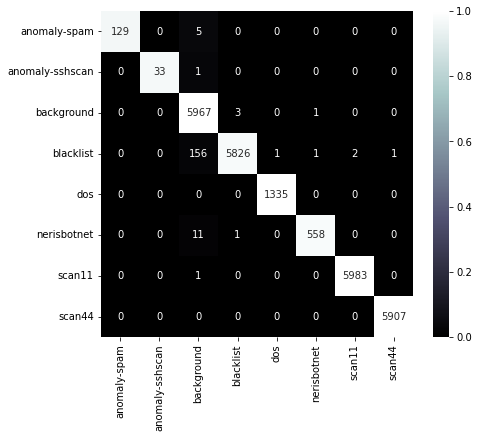

In [11]:
import pandas as pd 
import numpy as np 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pylab as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        
# read data
mydt = pd.read_csv("../dataset/UGR/train.csv")

le = LabelEncoder()
y_train = le.fit_transform(mydt.iloc[:,19])
X_train = mydt.iloc[:,0:19] 

# read test data
mydt2 = pd.read_csv("../dataset/UGR/test.csv")

y_test = le.fit_transform(mydt2.iloc[:,19])
X_test = mydt2.iloc[:,0:19] 

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

params = {'learning_rate': 0.6,
        'max_depth': 100,
        'objective': 'multi:softmax',  # error evaluation for multiclass training
        'num_class': 8,
        'eval_metric':"mlogloss"
}

model = xgb.train(params, dtrain)
y_pred = model.predict(dtest)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Printing XGBoost result:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("-----------------------------------------------------------------------")
print('Accuracy: {:.2f}%; precision: {:.2f}%; Recall: {:.2f}%; F1: {:.2f}%'.format(accuracy*100, precision*100, recall*100, f1*100)) # elapsed: {:.2f} s

plot_confusion_matrix(cm, classes=le.classes_)

/home/mltest/my_project/my_project_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Printing XGBoost result:
                 precision    recall  f1-score   support

   anomaly-spam       0.99      0.94      0.97       134
anomaly-sshscan       1.00      0.97      0.99        34
     background       0.97      0.96      0.96      5971
      blacklist       0.96      0.97      0.97      5987
            dos       1.00      1.00      1.00      1335
    nerisbotnet       0.99      0.98      0.98       570
         scan11       1.00      1.00      1.00      5984
         scan44       1.00      1.00      1.00      5907

       accuracy                           0.98     25922
      macro avg       0.99      0.98      0.98     25922
   weighted avg       0.98      0.98      0.98     25922

-----------------------------------------------------------------------
Accuracy: 98.30%; precision: 98.31%; Recall: 98.30%; F1: 98.30%


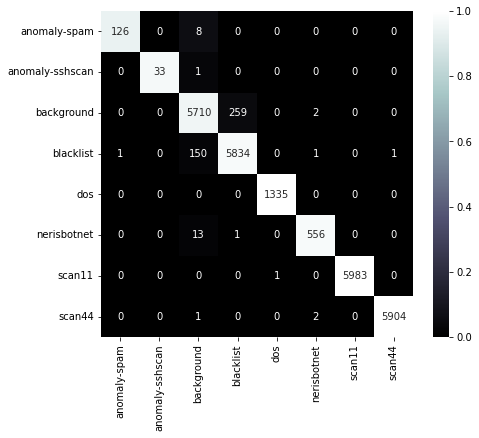

In [4]:
import pandas as pd 
import numpy as np 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pylab as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        
# read data
mydt = pd.read_csv("../dataset/UGR/train_ori.csv")

le = LabelEncoder()
y_train = le.fit_transform(mydt.iloc[:,19])
X_train = mydt.iloc[:,0:19] 

# read test data
mydt2 = pd.read_csv("../dataset/UGR/test.csv")

y_test = le.fit_transform(mydt2.iloc[:,19])
X_test = mydt2.iloc[:,0:19] 

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

params = {'learning_rate': 0.2,
        'max_depth': 20,
        'objective': 'multi:softmax',  # error evaluation for multiclass training
        'num_class': 8,
        'eval_metric':"mlogloss"
}

model = xgb.train(params, dtrain)
y_pred = model.predict(dtest)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Printing XGBoost result:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("-----------------------------------------------------------------------")
print('Accuracy: {:.2f}%; precision: {:.2f}%; Recall: {:.2f}%; F1: {:.2f}%'.format(accuracy*100, precision*100, recall*100, f1*100)) # elapsed: {:.2f} s

plot_confusion_matrix(cm, classes=le.classes_)

In [ ]:
model = XGBClassifier(use_label_encoder=True)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=evalset)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

%matplotlib inline
# Testing 
cm = confusion_matrix(y_test, y_pred) 
tnr = recall_score(y_test, y_pred) 
fpr = 1 - tnr

print ("confusion_matrix for test data\n",cm)
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))
print('FPR Score: %.4f' % fpr)

In [ ]:
#Plot Precision-Recall Curve 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')
ax.grid(False)

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
#plt.savefig('Precision-Recall_curve_XGBoost_UGR_after.png')
plt.show()

In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap='Oranges', alpha=0.3)
ax.grid(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
#plt.savefig('confusion_matrix_XGBoost_UGR_after.png')
plt.show()

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)
# plot learning curves
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(False)

plt.plot(x_axis, results['validation_0']['logloss'], label='train')
plt.plot(x_axis, results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()
#plt.savefig('model_loss_XGBoost_UGR_after.png')

In [ ]:
# plot classification error
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
plt.ylabel("Classification Error")
plt.title("XGBoost Classification Error")
#plt.savefig('model_error_XGBoost_UGR_after.png')
plt.show()

In [ ]:
# Plot ROC
from sklearn.metrics import auc, plot_precision_recall_curve, roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
plt.subplots(1, figsize=(10,5))
plt.title('ROC cure_b')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('Roc_curve_XGBoost_UGR_after.png')
plt.show()